# Analysis of lift and drag coefficients

In [25]:
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch as pt
from stl import mesh
from scipy.signal import welch
from flowtorch.data import FOAMDataloader, mask_box
from utils import fetch_force_coefficients, interpolate_uniform_1D

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

run = "/media/andre/Elements/naca0012_shock_buffet/run/"
output = "./output/naca0012_analysis/"
!mkdir -p $output

print("Matplolib version: ", mpl.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Numpy version:  1.19.5


In [2]:
# freestream Mach number
Ma = 0.75
# freestream speed
U_inf = 255.22
# freestream speed of sound
a_inf = U_inf / Ma
# chrod length
chord = 0.6010500

## Raw lift and drag data
### Pre-onset conditions

In [23]:
cases = glob(run + "rhoCF_set1_alpha2_*")
cases = [case.split("/")[-1] for case in cases]

Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0_tan0/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref1/postProcessing/forces/
Found 2 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref2/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g100/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g150/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g50/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buff

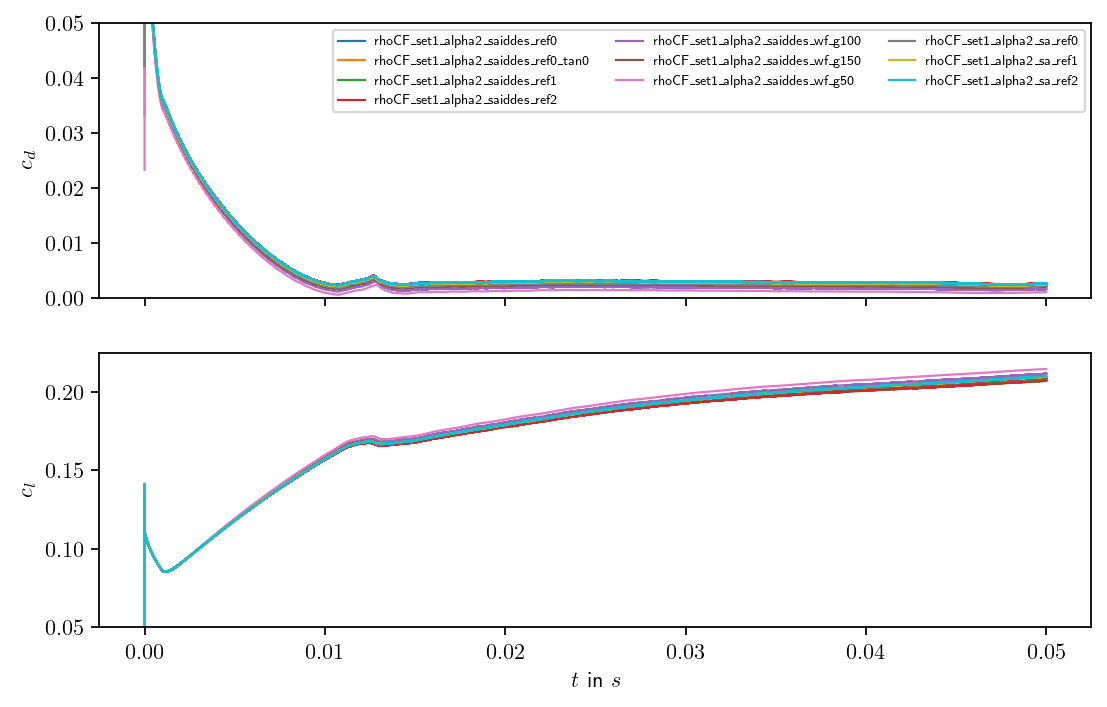

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    ax1.plot(t[::every], cd[::every], c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(0.0, 0.05)
ax2.set_ylim(0.05, 0.225)
plt.show()

### Buffet conditions, 2D

In [25]:
cases = glob(run + "rhoCF_set1_alpha4_*")
cases = [case.split("/")[-1] for case in cases if "z" not in case]

Found 4 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/forces/
Found 3 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_tan0/postProcessing/forces/
Found 5 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1/postProcessing/forces/
Found 7 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref2/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_wf_g100/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_wf_g150/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_wf_g50/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buff

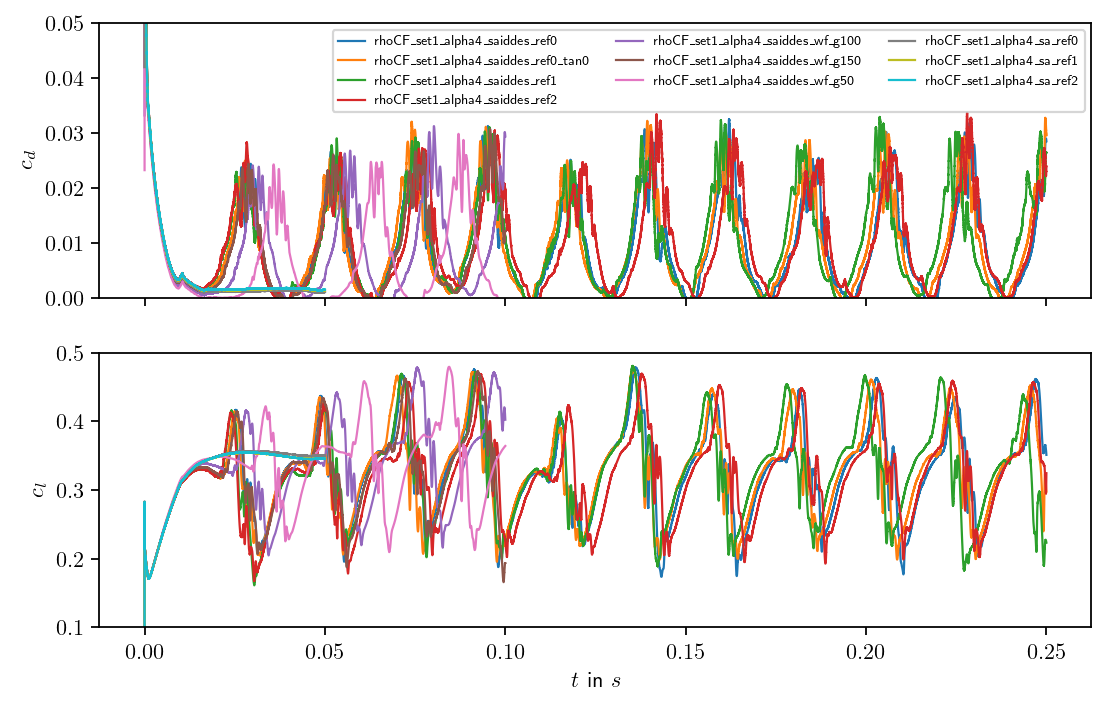

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    ax1.plot(t[::every], cd[::every], c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(0.0, 0.05)
ax2.set_ylim(0.1, 0.5)
plt.show()

### Buffet conditions, 3D

In [3]:
cases = glob(run + "rhoCF_set1_alpha4_*z*")
cases = [case.split("/")[-1] for case in cases]

Found 18 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/forces/
Found 23 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z50/postProcessing/forces/
Found 23 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1_z25/postProcessing/forces/


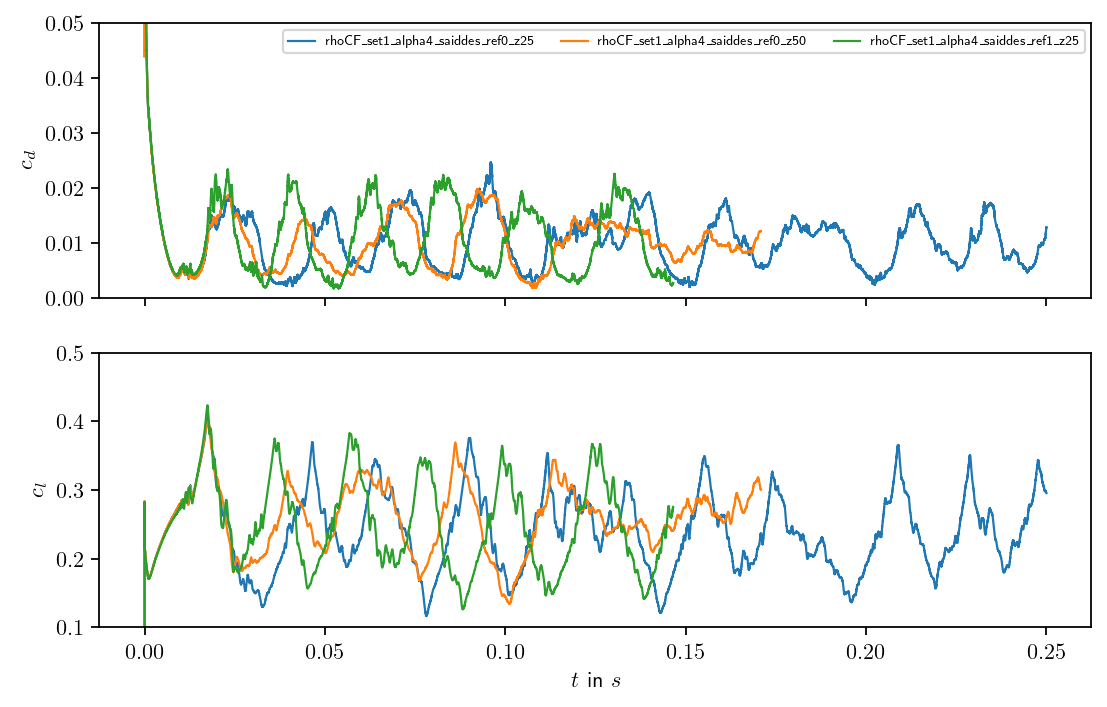

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    # forgot to adjust area in coefficient computation in OpenFOAM for z50 case; area should be twice as large
    fac = 0.5 if "z50" in case else 1.0
    ax1.plot(t[::every], cd[::every]*fac, c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every]*fac, c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(0.0, 0.05)
ax2.set_ylim(0.1, 0.5)
plt.show()

## Mesh dependency of extracted frequency spectrum

### Buffet conditions, 2D

In [5]:
def normalize_frequency(f):
    return 2*np.pi*chord*f/U_inf

In [6]:
cases_2D = [f"rhoCF_set1_alpha4_saiddes_ref{ref}" for ref in [0, 1, 2]]
every = 500
signals = {}
for case in cases_2D:
    path = run + case + "/postProcessing/forces/"
    t, _, cl = fetch_force_coefficients(path)
    t, cl = interpolate_uniform_1D(t[::every], cl[::every], 20000)
    signals[case] = (t, cl)

Found 4 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/forces/
Found 5 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1/postProcessing/forces/
Found 7 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref2/postProcessing/forces/


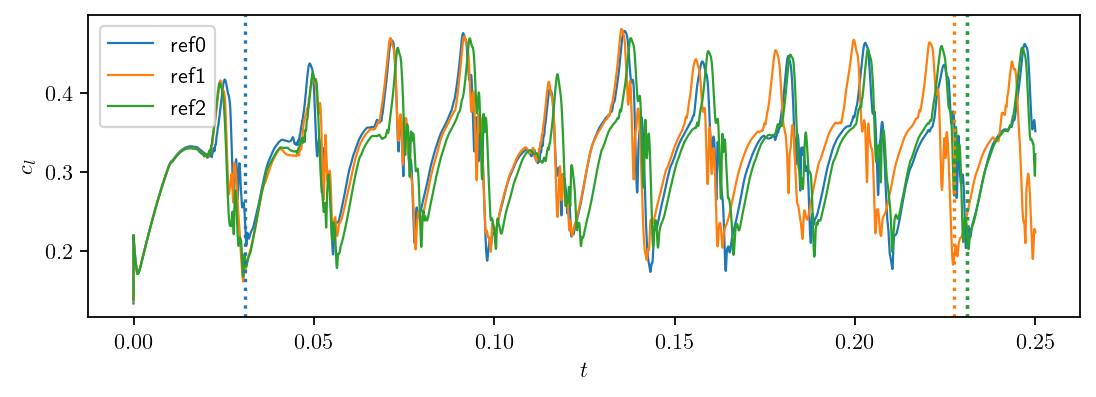

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

for key in signals.keys():
    t, cl = signals[key]
    ax.plot(t, cl, lw=1, label=key.split("_")[-1])
    
ax.axvline(0.031, ls=":", color="C0")
ax.axvline(0.231, ls=":", color="C0")
ax.axvline(0.2275, ls=":", color="C1")
ax.axvline(0.231, ls=":", color="C2")
ax.legend()
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$c_l$")
plt.show()

Mean lift: 0.3268
Std. lift: 0.0652
Two largest freq.: 45.0032Hz, 50.0035Hz
Two largest freq. (dimensionless): 0.6659Hz, 0.7399Hz
Mean lift: 0.3277
Std. lift: 0.0660
Two largest freq.: 45.8046Hz, 50.8940Hz
Two largest freq. (dimensionless): 0.6778Hz, 0.7531Hz
Mean lift: 0.3229
Std. lift: 0.0642
Two largest freq.: 45.0034Hz, 50.0037Hz
Two largest freq. (dimensionless): 0.6659Hz, 0.7399Hz


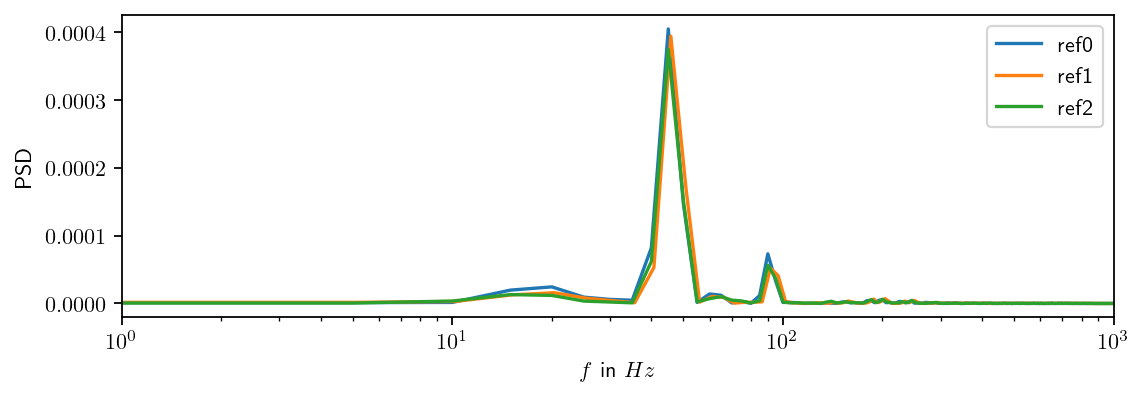

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

start_time = [0.031, 0.031, 0.031]
end_time = [0.231, 0.2275, 0.231]
n_cycles = 1

for i, key in enumerate(signals.keys()):
    t, cl = signals[key]
    dt = t[1] - t[0]
    fs = 20000/(t[-1]-t[0])
    start_idx = np.absolute(t-start_time[i]).argmin()
    end_idx = np.absolute(t-end_time[i]).argmin()
    points_interval = end_idx-start_idx
    nperseq = int(points_interval/n_cycles)
    f, amp = welch(cl[start_idx:end_idx].squeeze()-cl.squeeze()[start_idx:end_idx].mean(), fs=fs, nperseg=nperseq, nfft=points_interval)
    top_2 = amp.argsort()[-2:][::-1]
    print("Mean lift: {:2.4f}".format(cl.squeeze()[start_idx:end_idx].mean()))
    print("Std. lift: {:2.4f}".format(cl.squeeze()[start_idx:end_idx].std()))
    print("Two largest freq.: {:2.4f}Hz, {:2.4f}Hz".format(*f[top_2]))
    print("Two largest freq. (dimensionless): {:2.4f}Hz, {:2.4f}Hz".format(*normalize_frequency(f[top_2])))
    ax.plot(f, amp, label=key.split("_")[-1])
ax.set_xlim(1, 1000)
ax.set_xscale("log")
ax.set_xlabel(r"$f$ in $Hz$")
ax.set_ylabel(r"PSD")
ax.legend()
plt.show()

### Buffet conditions, 3D

In [39]:
cases_3D = [f"rhoCF_set1_alpha4_saiddes_ref{ref}_z25" for ref in [0, 1]]
cases_3D.append("rhoCF_set1_alpha4_saiddes_ref0_z50")

every = 100
signals_3D = {}
for case in cases_3D:
    path = run + case + "/postProcessing/forces/"
    t, _, cl = fetch_force_coefficients(path)
    t, cl = interpolate_uniform_1D(t[::every], cl[::every], 20000)
    signals_3D[case] = (t, cl)

Found 18 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/forces/
Found 23 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1_z25/postProcessing/forces/
Found 23 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z50/postProcessing/forces/


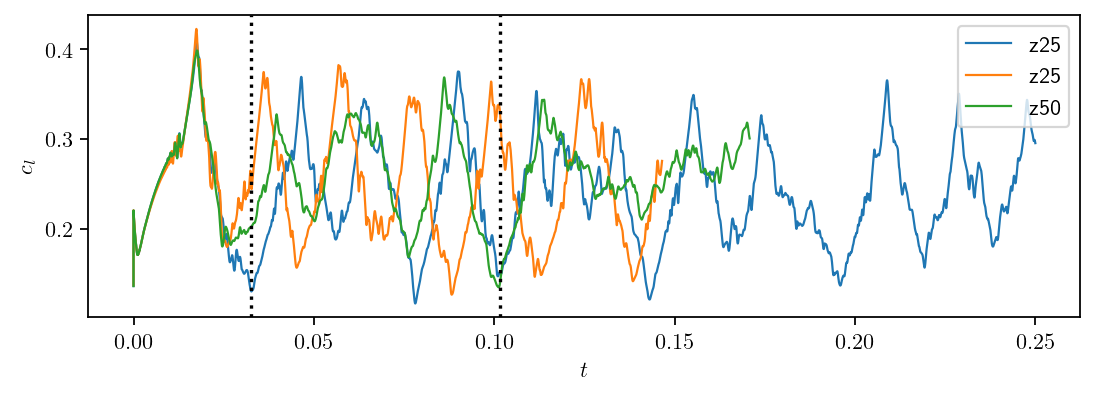

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

for key in signals_3D.keys():
    t, cl = signals_3D[key]
    if key == "rhoCF_set1_alpha4_saiddes_ref0_z50":
        fac = 0.5
    else:
        fac = 1.0
    ax.plot(t, fac*cl, lw=1, label=key.split("_")[-1])
ax.legend()
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$c_l$")
ax.axvline(0.0326, ls=":", color="k")
ax.axvline(0.1015, ls=":", color="k")
plt.show()

Two largest freq.: 43.5414Hz, 50.7983Hz
Two largest freq. (dimensionless): 0.6443, 0.7517
Two largest freq.: 50.8012Hz, 43.5439Hz
Two largest freq. (dimensionless): 0.7517, 0.6443
Two largest freq.: 36.2837Hz, 43.5404Hz
Two largest freq. (dimensionless): 0.5369, 0.6443


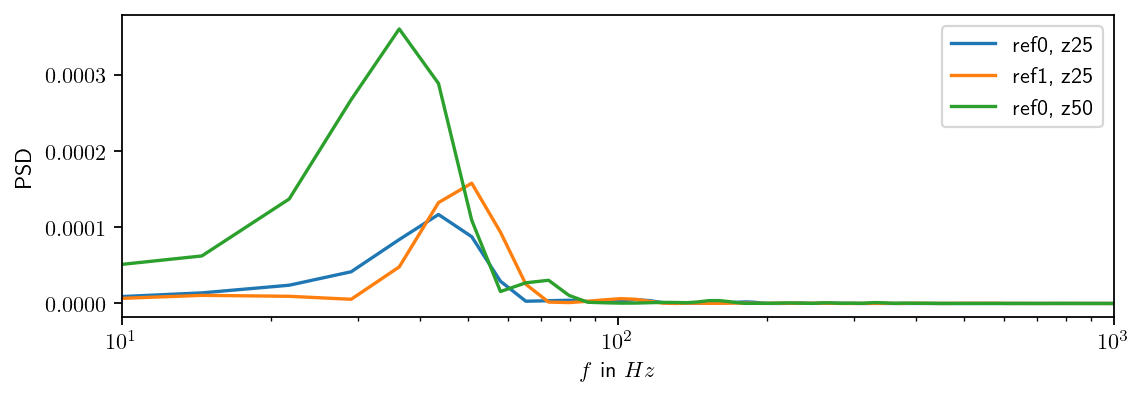

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
n_cycles = 1

for key in signals_3D.keys():
    t, cl = signals_3D[key]
    dt = t[1] - t[0]
    fs = 20000/(t[-1]-t[0])
    start_idx = np.absolute(t-0.0326).argmin()
    end_idx = np.absolute(t-0.1015).argmin()
    points_interval = end_idx-start_idx
    nperseq = int(points_interval/n_cycles)
    f, amp = welch(cl[start_idx:end_idx].squeeze()-cl.squeeze()[start_idx:end_idx].mean(), fs=fs, nperseg=nperseq, nfft=2*points_interval)
    top_2 = amp.argsort()[-2:][::-1]
    print("Two largest freq.: {:2.4f}Hz, {:2.4f}Hz".format(*f[top_2]))
    print("Two largest freq. (dimensionless): {:2.4f}, {:2.4f}".format(*normalize_frequency(f[top_2])))
    ax.plot(f, amp, label=", ".join(key.split("_")[-2:]))
ax.set_xlim(10, 1000)
ax.set_xscale("log")
ax.set_xlabel(r"$f$ in $Hz$")
ax.set_ylabel(r"PSD")
ax.legend()
plt.show()